# 3.0 - Métricas de avaliação de modelos:

* 3.1 - Precision (Classificação)
* 3.2 - Recall (Classificação)
* 3.3 - F1 (Classificação)
* 3.4 - Gini (Classificação)
* 3.5 - AUC (Classificação)
* 3.6 - KS (Classificação)
* 3.7 - RMSE (Regressão) 
* 3.8 - MAE (Regressão)
* 3.9 - R2 (Regressão)


## 1 - Introdução 

---

### 1.1 Definição de métricas de avaliação:

<p>Uma métrica de avaliação quantifica o desempenho de modelo preditivo.</p>

* Por quê as metricas são importantes?
    * Objetivo de treinamento (cost function) é somente um proxy para objetivos do mundo real.
    * Métricas ajudam a capturar um objetivo de negócio para um alvo quantitativo (nem todos os erros são iguais)
    * Ajuda a organizar o esforço do time de ML (Machine Learning) em direção ao alvo.
        * Geralmente na forma de melhorar a métrica no dev set.
    * Útil em quantificar o "vão" entre:
        * Performance desejada e patamar (estimativa de esforço inicial).
        * Performance desejada e performance atual.
        * Medida de progresso no tempo.
    * Útil para tarefas de nível baixo e debugar.

### 1.2 - Variáveis:

* **TPR (True Positive Rate)**: é a probabilidade de que o modelo detecte um positivo real como positivo. Em outras palavras, é a proporção dos positivos reais  que são detectados como positivos pelo modelo. Também é conhecido como <code>sensitivity</code>. Matematicamente: $$TPR=P(\widehat{x}=1|x=1)$$

* **TNR (True Negative Rate)**: é a probabilidade de que o modelo detecte um negativo real como negativo. Em outras palavras, é a proporção dos negativos reais que são detectados como negativos pelo modelo. Também é conhecido como <code>specificity</code>. Matematicamente: $$TNR=P(\widehat{x}=0|x=0)$$ 

* **FPR (False Positive Rate)**: é a probabilidade que o modelo detecte um negativo real como positivo. Em outras palavras, é a proporção dos negativos reais que são detectados como positivos pelo modelo. Também é conhecido como <code>Type I error</code>. Matematicamente: $$FPR=P(\widehat{x}=1|x=0)$$

* **FNR (False Negative Rate)**: é a probabilidade que o modelo detecte um positivo real como negativo. Em outras palavras, é a proporção dos positivos reais que são detectados como negativos pelo modelo. Também é conhecido como <code> Type II error</code>. Matematicamente: $$FNR=P(\widehat{x}=0|x=1)$$  

### 1.3 - Confusion matrix para visualização:

* Abaixo temos um exemplo de confusion matrix:
    * Vamos importar a função confusion_matrix do sklearn.metrics para calcular

In [2]:
from sklearn.metrics import confusion_matrix

y_true = [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0]
y_pred =  [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]
confusion_m = confusion_matrix(y_true, y_pred)
print(confusion_m)

[[5 2]
 [1 4]]


* Como vemos acima nos é entregue um array contendo 5, 2, 1, 4 para ilustrar melhor como interpretar vamos criar novamente os dados acima, mas agora usando pandas para que seja possível explicar de uma forma mais simples.

In [3]:
import pandas as pd

data = {'y_Actual':    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
        'y_Predicted': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted  0  1
Actual         
0          5  2
1          1  4


* Agora podemos observar que temos as colunas sendo nomeadas como 0 e 1 assim como as linha. Portanto quando temos a combinação:

    * linha 0 e coluna 0 determinamos **TP (True Positive)**

    * linha 0 e coluna 1 determinamos **FP (False Positive)**

    * linha 1 e coluna 0 determinamos **FN (False Negative)**

    * linha 1 e coluna 1 determinamos **TN (True Negative)**

Portanto:

In [4]:
print("\nTP (True Positive) = {}\nFP (False Positive) = {} \nFN (False Negative) = {}\nTN (True Negative) = {}".format(
                            confusion_m[0][0], confusion_m[0][1],
                            confusion_m[1][0], confusion_m[1][1]))


TP (True Positive) = 5
FP (False Positive) = 2 
FN (False Negative) = 1
TN (True Negative) = 4


* Ainda podemos criar um mapa de calor usando as bibliotecas seaborn e matplotlib para conseguirmos uma fácil e rápida identificação.

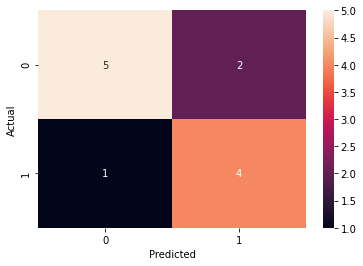

In [5]:
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_Actual':    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
        'y_Predicted': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

* Extra: podemos determinar a acuracidade do modelo com a fórmula **$\frac{(TP+TN)}{(TP+TN+FP+FN)} = \frac{5+4}{5+4+2+1}=\frac{9}{12}=0.75$** . Abaixo veremos como verificar melhor a eficiência de uma modelo seguindo métricas avaliativas mais completas.

    * Mas antes vamos definir como são calculados o TPR, TNR, FPR e FNR para podermos seguir com os modelos:

        * **TPR (True Positive Rate)**: $\frac{TP}{(TP+FN)}$
        * **FNR (False Negative Rate)**: $\frac{TN}{(TN+FP)}$

        * **FPR (False Positive Rate)**: $\frac{FP}{(FP+TN)}$
        * **FNR (False Negative Rate)**: $\frac{FN}{(FN+TP)}$

---

## 3.1 - Precision

### 3.1.1 - Definição

* Nos traz o quão relevantes são as detecções positivas. Quanto maior a precision melhor o nosso mecanismo de detecção. Seguindo a fórmula: $Precision=\frac{\text{TP}}{\text{TP + FP}}=\frac{\text{TP}}{\text{Total Predicted Positive}}$
* Quando o custo do FP é alto é bom em determinar.

### 3.1.2 - Aplicação

* Em python podemos importar a função <code>precison_score</code> da biblioteca <code>metrics</code> do <code>sklearn</code>. Ainda dentro da função temos que definir 'average' em:
    * 'binary' (padrão): somente analisa para a classe especificada em <code>pos_label</code>. É aplicável somente se o objeto (<code>y_{true, pred}</code> é binário.
    * 'micro': calcula as métricas de forma global, contando o total de TP, FN e FP.
    * 'macro': calcula as métricas para cada rótulo, e encontra sua média sem peso. Não toma o desiquilíbrio dos rótulos em consideração.
    * 'weighted': calcula as métricas para cada rótulo, e encontra a média deles pelo peso do suporte (o número de instâncias para cada rótulo).
    * 'samples': calcula as métricas para cada instância, e encontra as suas média.
* É aplicável para modelos de classificação como: <code>Neural Networks</code>, <code>k-nearest neighbors</code>, <code>Naive Bayes</code>, <code>Decision Trees</code>, <code>Support vector machines</code> e <code>Hierarchical classification</code>   

In [10]:
# --- importando bibliotecas ---
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

# --- carregando iris dataset ---
X = sns.load_dataset('iris')[20:]
y = X.pop('species')

# --- treinando o modelo ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
rf = RandomForestClassifier(n_estimators = 10, n_jobs = -1)
rf.fit(X_test, y_test)
y_pred = rf.predict(X_test)

# --- mostrando o resultado na metrica ---
print('Micro : {}'.format(precision_score(y_test, y_pred, average = 'micro')))
print('Macro : {}'.format(precision_score(y_test, y_pred, average = 'macro')))
print('Weighted : {}'.format(precision_score(y_test, y_pred, average = 'weighted')))

Micro : 1.0
Macro : 1.0
Weighted : 1.0


* Como pegamos um exemplo onde usamos uma Classification tree que nos entrega previsões não binárias, não podemos usar a opção <code>binary</code>, entretanto podemos ver que as outras opções são aplicáveis, e como o modelo está otimizado é possível verificar que todos estão dando 100%.

### 3.1.3 - Como interpretar

* Quanto maior o valor melhor, o mesmo como visto acima chega ao máximo em 100% ou 1.
---

## 3.2 - Recall

### 3.2.1 - Definição:

* O Recall calcula quantos dos Positivos realmente foram captados pelo modelo através da rotulação como positivo (TP). Ele será a métrica usada quando o nosso modelo ter um alto custo associado com o FN. Podemos pbservar melhor pela sua função: $Recall=\frac{\text{TP}}{\text{TP + FN}}=\frac{\text{TP}}{\text{Total Actual Positive}}$

### 3.2.2 - Aplicação:

* Em python podemos importar a função <code>recall_score</code> da biblioteca <code>metrics</code> do <code>sklearn</code>. Ainda dentro da função temos que definir 'average' em:
    * 'binary' (padrão): somente analisa para a classe especificada em <code>pos_label</code>. É aplicável somente se o objeto (<code>y_{true, pred}</code> é binário.
    * 'micro': calcula as métricas de forma global, contando o total de TP, FN e FP.
    * 'macro': calcula as métricas para cada rótulo, e encontra sua média sem peso. Não toma o desiquilíbrio dos rótulos em consideração.
    * 'weighted': calcula as métricas para cada rótulo, e encontra a média deles pelo peso do suporte (o número de instâncias para cada rótulo).
    * 'samples': calcula as métricas para cada instância, e encontra as suas média.
* É aplicável para modelos de classificação como: <code>Neural Networks</code>, <code>k-nearest neighbors</code>, <code>Naive Bayes</code>, <code>Decision Trees</code>, <code>Support vector machines</code> e <code>Hierarchical classification</code>  

In [11]:
from sklearn.metrics import recall_score

print('Micro : {}'.format(recall_score(y_test, y_pred, average = 'micro')))
print('Macro : {}'.format(recall_score(y_test, y_pred, average = 'macro')))
print('Weighted : {}'.format(recall_score(y_test, y_pred, average = 'weighted')))

Micro : 1.0
Macro : 1.0
Weighted : 1.0


* Como pegamos um exemplo onde usamos uma Classification tree que nos entrega previsões não binárias, não podemos usar a opção <code>binary</code>, entretanto podemos ver que as outras opções são aplicáveis, e como o modelo está otimizado é possível verificar que todos estão dando 100%.

### 3.2.3 - Como interpretar

* Quanto maior o valor melhor, o mesmo como visto acima chega ao máximo em 100% ou 1.
---

## 3.3 - F1 Score

### 3.3.1 - Definição

* É a média harmônica entre precision e recall. Tendo um intervalo de [0, 1]. Diz o quão preciso o classificador é (quantas instâncias são classificadas corretamente), e quanto elas são robustas (não perde um número significante de instâncias): $F1=2\times{\frac{\text{Precision} \times \text{Recall}}{\text{Precision+Recall}}}$
* Pode ser uma boa métrica se é necessário buscar um equilíbrio entre Precision e Recall e quando há uma distribuição de classe desigual.

### 3.3.2 - Aplicação

* Em python podemos importar a função <code>fi_score</code> da biblioteca <code>metrics</code> do <code>sklearn</code>. Ainda dentro da função temos que definir 'average' em:
    * 'binary' (padrão): somente analisa para a classe especificada em <code>pos_label</code>. É aplicável somente se o objeto (<code>y_{true, pred}</code> é binário.
    * 'micro': calcula as métricas de forma global, contando o total de TP, FN e FP.
    * 'macro': calcula as métricas para cada rótulo, e encontra sua média sem peso. Não toma o desiquilíbrio dos rótulos em consideração.
    * 'weighted': calcula as métricas para cada rótulo, e encontra a média deles pelo peso do suporte (o número de instâncias para cada rótulo).
    * 'samples': calcula as métricas para cada instância, e encontra as suas média.
* É aplicável para modelos de classificação como: <code>Neural Networks</code>, <code>k-nearest neighbors</code>, <code>Naive Bayes</code>, <code>Decision Trees</code>, <code>Support vector machines</code> e <code>Hierarchical classification</code>  

In [12]:
from sklearn.metrics import f1_score
print('Micro : {}'.format(f1_score(y_test, y_pred, average = 'micro')))
print('Macro : {}'.format(f1_score(y_test, y_pred, average = 'macro')))
print('Weighted : {}'.format(f1_score(y_test, y_pred, average = 'weighted')))

Micro : 1.0
Macro : 1.0
Weighted : 1.0


* Como pegamos um exemplo onde usamos uma Classification tree que nos entrega previsões não binárias, não podemos usar a opção <code>binary</code>, entretanto podemos ver que as outras opções são aplicáveis, e como o modelo está otimizado é possível verificar que todos estão dando 100%.

### 3.3.3 - Como interpretar

* Quanto maior o valor melhor, o mesmo como visto acima chega ao máximo em 100% ou 1.
---

## 3.4 - Coeficiente Gini - Modelos de Classificação

### 3.4.1 - **Definição** (Primeiramente vamos entender a ROC curve para vermos como o Gini se aplica):

* 3.2.1.1 - **ROC (Receiver Operating Characteristic) curve**:
    * A medida abaixo da área da ROC curve plota TPR x FPR, essa curva nos possibilita visualizar a troca entre TPR e FPR. A imagem abaixo ilustra muito bem essa análise.
        
        
![3.1.1 fig](https://static.wixstatic.com/media/3eee0b_e8dc1805e79e48fd9640e9e877776ef8~mv2.png/v1/fill/w_443,h_309,al_c,q_95/3eee0b_e8dc1805e79e48fd9640e9e877776ef8~mv2.webp)
        
### 3.4.2 - Definição

* O coeficiente Gini é comparável ao AUC score, por ser um métrica baseada em rank que pode ser usado para medir o quão bem o seu modelo é em discriminar valores VERDADEIROS e FALSOS (0, 1).
* A imagem abaixo demostra a diferença entre os métodos GINI e ROC-AUC
    
    ![AUC-GINI](https://queirozf.com/images/contents/6vM80gn.png)
    
### 3.4.3 - Aplicação    

* O Gini pode ser calculado pela função $Gini = 2 \times \text{ROC_curve} - 1$ e como precisamos de um modelo que gere valors VERDADEIROS e FALSOS vamos treinar um usando Logistic Regression, aplicando a métrica roc_auc_score e usar a função descrita anteriormente, juntamente com um gráfico ROC para ilustrando como visto acima:

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc
import matplotlib.pyplot as plt

# importando o dataser de um arquivo csv do Git
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv(url)

X = data[['student', 'balance', 'income']]
y = data['default']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

log_regression = LogisticRegression()
log_regression.fit(X_train,y_train)

y_pred_proba = log_regression.predict_proba(X_test)[::,1] # [::,1] significa todos os itens do array revertidos

ROC_score = roc_auc_score(y_test, y_pred_proba)

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

gini = ROC_score * 2 -1
gini

0.8100057934408438

* Um modelo com coeficiente Gini maior que 60% é considerado bom, e como vemos nós temos um com 81%.

### 3.4.4 - Demostração gráfica

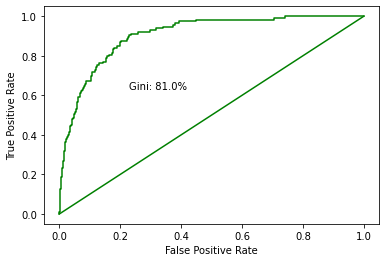

In [15]:
# Criando a curva ROC
plt.plot(fpr,tpr, c = 'green')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(np.array(range(0, 2)),np.array(range(0, 2)), c = 'green')
plt.annotate('Gini: {}%'.format(round(gini, 2)*100), (0.23, 0.63))
plt.show()

* A área destacada em verde é definida como a área do GINI como visto anteriormente acima. 
---    

## 3.5 - AUC (Area Under ROC curve) - Modelos de Classificação

### 3.5.1 - Definição:

* AUC mede toda a área de duas dimensões abaixo da curva ROC ($\int^{1}_{0} ROC\ dx$):
    
![4.0](https://developers.google.com/machine-learning/crash-course/images/AUC.svg)  

* Como vemos acima a AUC varia de 0 a 1 como, portanto se o modelo prevê 100% errado teremos um AUC de 0.0; e um com prvisões 100% corretas tem um AUC de 1.0.
    
* AUC é desejável pelas razões:
    * AUC é **scale-invariant**, ou seja, ele mede o quão boas as previsões são elencadas, ao invés de seus valores absolutos
        * AUC é **classification-threshold-invariant**, ou seja, ele mede a qualidade das previsões do modelo independentemente do limiar escolhido para a classificação
        
    * Entretanto essas razões trazem algumas ressalvas:
        * **Scale-invariance** não é sempre desejável, quando, nós realmente precisamos de saídas bem valibradas, e a AUC não nos irá dizer sobre isso.
        * **Classification-threshold-invariance** não é desejável, quando, em casos onde temos grandes disparidades pelo custo de FN x FP, pode ser crítico minimizar um dos erros de classificação.

### 3.5.2 - Aplicação:

* Em python basta importarmos da bliblioteca <code>metrics</code> do scikit lean a função <code>auc</code> 

### 3.5.3 - Como interpretar:

* Vamos usar o mesmo modelo utilizado acima GINI e simplesmente calcular a métrica <code>auc</code>

In [16]:
auc(fpr, tpr)

0.9050028967204219

* Como vemos foi ternado um valor de 90%, valores acima de 80% já são considerados bons para certos modelos de classificação.

### 3.5.4 - Demostração gráfica:

* Vamos novamente utilizar os mesmos dados anteriores para gerar um gráfico

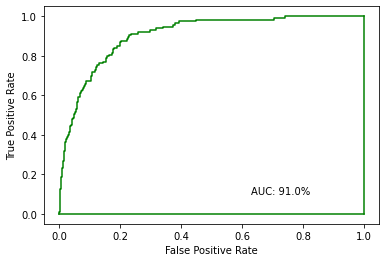

In [17]:
# Criando a curva ROC
plt.plot(fpr,tpr, c = 'green')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0,1],[0,0], c = 'green') 
plt.plot([1,1],[0,1], c = 'green') 
#plt.plot(np.array(range(0, 2)),np.array(range(0, 2)), c = 'blue', linestyle = '--') 
plt.annotate('AUC: {}%'.format(round(auc(fpr, tpr), 2)*100), (0.63, 0.1))
plt.show()

## 3.6 - KS (Kolmogorov-Smirnov) - Modelos de Classificação

### 3.6.1 - Definição:

* Em estatística esse método nos dá uma noção da **distância** entre duas distribuições. Ou seja, a distância máxima entre as funções de distribuição empíricas ou ECDFs em inglês.

### 3.6.2 - Aplicação:

* Em ML podemos usar esse método quando temos um alto valor no score de treino, mas um baixo no de teste.
* Podemos simplesmente utilizar a biblioteca scipy e importar stats usando a função <code>stats.ks_2samp()</code> usando f.d.a em ambos os dados para comparação.

### 3.6.3 - Python:

* Na prática ela nos diz que quanto maior for o valor, maior será a diferença entre as distribuições. Observe o exemplo abaixo:


In [19]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X = sns.load_dataset('iris')[20:]
y = X.pop('species')
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, shuffle=False)

In [20]:
stats.ks_2samp(X_train.sepal_length, X_test.sepal_length)

KstestResult(statistic=0.5511895215183106, pvalue=9.307408954661867e-09)

* Nesse caso podemos verifiar que 0.55 é muito, pois o ECDF gera probabilidades entre 0 e 1. O que faz sentido, pois quando dividimos os dados o parâmetro **shuffle** estava setado para **False**, o que simula uma divisão de dados não randomica.
* O pvalue, em contrapartida, nos dá a noção da significância do teste estatístico. Nos conta o quanto podemos confiar no teste. Como temos $9.3e^-9$ que está próximo de 0 (usualmente seria suficiente estando abaixo de 0.05, ou até 0.1, dependendo do contexto).
* Agora vamos retirar o **shuffle = False** e ver como se comporta.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
stats.ks_2samp(X_train.sepal_length, X_test.sepal_length)

KstestResult(statistic=0.11895215183106121, pvalue=0.7581591015148161)

* Nesse caso como utilizamos um modelo já otimizado podemos ver que o KS nos entrega um valor-p de 1, mostrando que o modelo está otimizado, entretando, vale ressaltar que o KS é melhor aplicado em outros casos, como veremos abaixo um caso onde ele foi aplicado 

### 3.6.4 - Demostração Gráfica

* Apesar de uma análise numérica ser o suficiente para extrairmos uma conlusão válida da aplicação do método KS, podemos aplicá-lo juntamente a outros casos, abaixo veremos um caso onde o método Kolgomorov Smirnov é usado em um modelo para uma campanha de marketing, onde é usado para medir a % da população necessária para obter o maior número possível de respostas. Como mostra o modelo abaixo.

![2.4](https://www.machinelearningplus.com/wp-content/uploads/2021/06/Kolmogorov_Smirnov_Chart-1-1024x597.png?ezimgfmt=ng:webp/ngcb4https://www.machinelearningplus.com/wp-content/uploads/2021/06/Kolmogorov_Smirnov_Chart-1-1024x597.png?ezimgfmt=ng:webp/ngcb4)

---

---
## 3.7 - RMSE (Root Mean Square Error)

### 3.7.1 - Definição:

* É o desvio padrão dos erros que ocorreram quando um previsão foi realizada em um dataset. Sendo similar ao MSE (Mean Squared Error), mas a raiz quadrada é considerada enquanto determinando a precisão do modelo:
    * MSE = $\sum^{n}_{i=1} {\frac{(Y_i - \widehat{Y}_i)^2}{n}}$
    
    * RMSE = $\sqrt{\sum^{n}_{i=1} {\frac{(Y_i - \hat{Y}_i)^2}{n}}}$
    
### 3.7.2 - Aplicação

* Em Python podemos usar a função <code>mean_squared_error</code> da biblioteca <code>metric</code> do <code>skleran</code> e tirando a raiz dessa função encontramos a RMSE conforme demostrado acima

### 3.7.3 - Como interpretar

* Como se trata de 'error' devemos lembrar que queremos que esse indicador tenha o menor valor possível para assim conseguimos avaliar nosso modelo de regressão, podemos analisar o exemplo abaixo:

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X = diabetes_X[:, np.newaxis, 2]

diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

regr = LinearRegression()

regr.fit(diabetes_X_train, diabetes_y_train)

diabetes_y_pred = regr.predict(diabetes_X_test)

print("RMSE = {:.2f}".format(np.sqrt(mean_squared_error(diabetes_y_test, diabetes_y_pred))))

RMSE = 50.48


* Como podemos observar o RMSE está muito elavado, mostrando que os dados estão muito dispersos e que o modelo não apresenta previsões satisfatórias.

### 3.7.4 - Demostração Gráfica

* Abaixo visualizamos o motivo do RMSE estar muito elevado, enquanto temos o modelo com a regressão linear cruzando o gráfico, vamos que há uma dispersão distante da regressão.

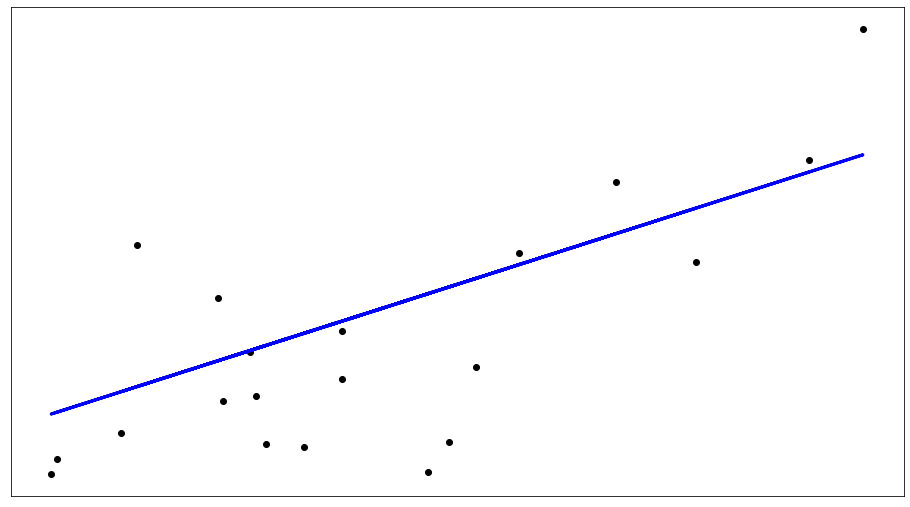

In [34]:
# Plot outputs
fig, ax = plt.subplots(figsize = (16,9))
ax.scatter(diabetes_X_test, diabetes_y_test,  color='black')
ax.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## 3.8 - MAE (Mean Absolute Error)

### 3.8.1 - Definição

* É muito similar ao MSE, entretanto, enquanto o MSE usa soma dos quadrados dos erros, o MAE usa a suma do valor absoluto do erro
* MAE = $\sum^{n}_{i=1} \frac{|y_i - \hat{y}_i|}{n}$
* Comparando a MSE ou RMSE, MAE é uma representação mais direta na soma dos erros. MSE entrega uma grande penalidade para previsões erradas ao quadraro enquanto MAE trata todos os erros iguais.

### 3.8.2 - Aplicação

* Em python podemos importar a função <code>mean_absolute_error</code> da biblioteca <code>metrics</code> do <code>sklearn</code>. Vamos usar novamente o exemplo acima para calcular a MAE:

In [35]:
from sklearn.metrics import mean_absolute_error
print("MAE = {:.2f}".format(mean_absolute_error(diabetes_y_test, diabetes_y_pred)))

MAE = 41.23


### 3.8.3 - Como interpretar

* Assim como MSE e RMSE quanto menor o valor melhor, se RSME = MAE, etão todos os erros possuem a mesma magnitude.

### 3.8.4 - Demostração Gráfica

* Vamos utilizar o mesmo gráfico anterior somente para visualizarmos novamente a dispersão dos dados:

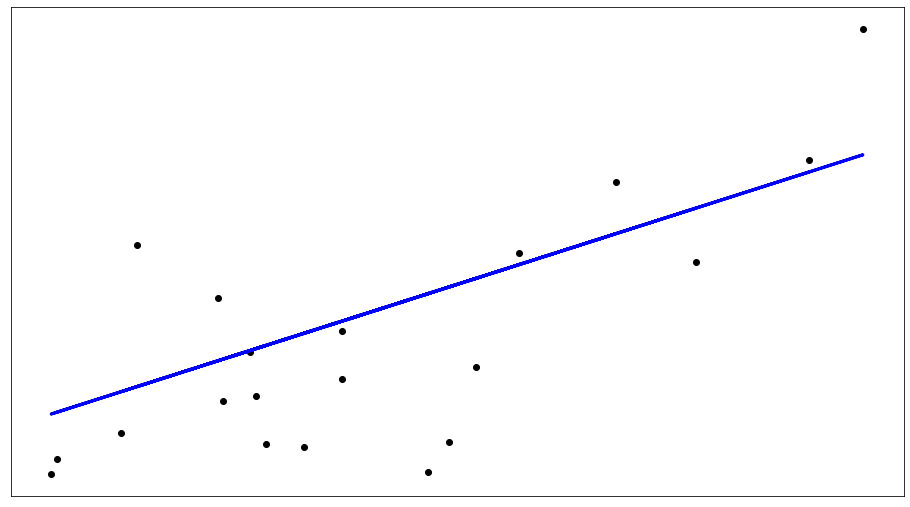

In [36]:
# Plot outputs
fig, ax = plt.subplots(figsize = (16,9))
ax.scatter(diabetes_X_test, diabetes_y_test,  color='black')
ax.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## 3.7 - R2

### 3.7.1 - Definição:

* Mede quanto variabilidade em certa variável pode ser explicada pelo modelo. Sendo definido por: $R^2=1-\frac{SS_\text{Regression}}{SS_\text{Total}}=1-\frac{\sum_i (y_i - \hat{y}_i)^2}{\sum_i (y_i - \overline{y})^2}$
* Sendo calculado pela suma do quadrado do erro da previsão dividido pela soma total do quadrado que substitui previsão calculada pela média.
* Bem aplicado em determinar o quão bem o modelo se encaixa em variáveis dependentes. Entretanto, não leva em consideração problemas de overfitting. Se o modelo possui muitas variáveis independentes, por causa do modelo ser muito complexo, pode se sair muito bem nos dados de treino, mas ter um desempenho não desejado nos dados de teste.

### 3.7.2 - Aplicação:

* Em python podemos importar a função <code>r2_score</code> da biblioteca <code>metrics</code> do <code>sklearn</code>. Vamos ilustrar agora com um caso simples, somente para demonstração:

In [37]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)

0.9486081370449679